# Predict shoulder prognosis from prosthesis position

Predict each of those clinical outcome:
- AFE = forward elevation in degree, the higher the better
- AIR = highest vertebra touched, buttock < SI < ... < L3 < ... < T12 < T8
- AER = external rotation in degree, the higher the better
- PAIN = felt pain, the higher the worst
- TOTAL = fonctional score, the higher the better
- SCAP = scapula postop fracture

from the preop/postop prosthesis position: 
- LSA (lateralisation angle)
- DSA (distalisation angle)
- GT-glenoide
- CDR-glenoide
- H: acromi
- L: Acromi
- beta angle
- tilt horzontal (angle negatif vers le haut, pas bien)
- tilt fosse (angle negatif qd omoplate regarde vers le haut)
- CSA (only preop)
- do not take CDR GT (hidden)

Is there a position that gives best result for 1/ everyone or 2/ with respect to preop data ?

ask JDW de me rappeler les unités et intervals de chaque feature

In [222]:
import pandas as pd

xls = pd.ExcelFile('./Stats_David_new.xlsx')
patients = pd.read_excel(xls, 'Datas and History', header=2)
patients = patients[['No.', 'INCLUDE']]
print(f"Number of included patients: {patients[patients['INCLUDE'] == 1.0].shape[0]}")

Number of included patients: 101


In [223]:
# clinical outcomes to predict...
y = pd.read_excel(xls, 'COMPL+Clinic FU', header=2)
yincl = pd.merge(y, patients, on='No.')
y = yincl.loc[yincl['INCLUDE'] == 1.0]
y = y[['No.','Scapular Fracture', 'A FE °', 'A IR (Hand)', 'A ER°', 'Pain ', 'Total']]
y.columns = ['No.', 'ySCAP', 'yAFE', 'yAIR', 'yAER', 'yPain', 'yTotal']

In [224]:
# ...from prosthesis position
preX = pd.read_excel(xls, 'Preop Rx', header=0)
preXincl = pd.merge(preX, patients, on='No.')
preX = preXincl.loc[preXincl['INCLUDE'] == 1.0]
preX = preX[['No.', 'CSA', 'LSA', 'DSA', 'Glene - CDR', 'Glene-GT',
             'H: Acromion-GT', 'L: Acromion - GT', 'Beta Angle',
             'Tilt Horizontale', 'Tilt fosse/Horizontale']]
preX.columns = ['No.', 'CSA', 'preLSA', 'preDSA', 'preGleneCDR', 'preGleneGT',
                'preAcromionH', 'preAcromionL', 'preBetaAngle',
                'preTiltH', 'preTiltF']

postX = pd.read_excel(xls, 'Postop RX', header=0)
postXincl = pd.merge(postX, patients, on='No.')
postX = postXincl.loc[postXincl['INCLUDE'] == 1.0]
postX = postX[['No.', 'LSA', 'DSA', 'CDR-Glenoid', 'GT-Glenoid',
               'H: Acromion-GT', 'L: Acromion - GT', 'Beta Angle',
               'Tilt Verticale', 'Tilt fosse/Horizontale']]
postX.columns = ['No.', 'postLSA', 'postDSA', 'postGleneCDR', 'postGleneGT',
                 'postAcromionH', 'postAcromionL', 'postBetaAngle',
                 'postTiltH', 'postTiltF']

X = pd.merge(preX, postX, on='No.')
data = pd.merge(X, y, on='No.')
data = data.set_index('No.')

In [225]:
data.head()

,CSA,preLSA,preDSA,preGleneCDR,preGleneGT,preAcromionH,preAcromionL,preBetaAngle,preTiltH,preTiltF,...,postAcromionL,postBetaAngle,postTiltH,postTiltF,ySCAP,yAFE,yAIR,yAER,yPain,yTotal
No.,,,,,,,,,,,,,,,,,,,,,
1,22.27,68.65,30.47,3.03,5.59,2.73,-0.65,86.75,22.92,26.17,...,1.07,71.97,5.12,23.15,0,160,T12,10,15.0,80.0
2,33.64,89.11,24.09,3.62,6.02,2.16,0.95,71.52,4.35,22.83,...,1.96,83.54,10.72,17.18,0,160,T12,60,15.0,81.0
4,32.63,95.86,27.62,3.11,5.61,1.46,1.67,79.89,5.15,15.26,...,2.20,87.55,18.58,21.03,0,140,Buttock,60,10.0,70.0
6,45.72,104.00,11.65,2.82,5.29,0.92,1.00,72.47,-10.83,6.70,...,1.53,121.61,26.80,-4.81,1,90,Buttock,60,6.0,28.0
7,31.22,97.85,31.90,3.31,5.96,2.66,1.51,81.57,-2.21,6.22,...,2.57,69.82,-3.49,16.69,0,110,T12,20,10.0,60.0


In [226]:
data[['CSA', 'yAFE','yAER', 'yPain', 'yTotal']] = data[['CSA', 'yAFE','yAER', 'yPain', 'yTotal']].apply(pd.to_numeric)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 1 to 51L
Data columns (total 25 columns):
CSA              93 non-null float64
preLSA           93 non-null float64
preDSA           93 non-null float64
preGleneCDR      83 non-null float64
preGleneGT       83 non-null float64
preAcromionH     83 non-null float64
preAcromionL     83 non-null float64
preBetaAngle     91 non-null float64
preTiltH         93 non-null float64
preTiltF         91 non-null float64
postLSA          99 non-null float64
postDSA          99 non-null float64
postGleneCDR     99 non-null float64
postGleneGT      99 non-null float64
postAcromionH    99 non-null float64
postAcromionL    99 non-null float64
postBetaAngle    98 non-null float64
postTiltH        99 non-null float64
postTiltF        98 non-null float64
ySCAP            101 non-null int64
yAFE             98 non-null float64
yAIR             98 non-null object
yAER             98 non-null float64
yPain            98 non-null float64
yTotal        

In [227]:
data['yAIR'].value_counts()

L3         30
T12        28
SI         21
Buttock    11
T8          8
Name: yAIR, dtype: int64

In [228]:
data.describe()

,CSA,preLSA,preDSA,preGleneCDR,preGleneGT,preAcromionH,preAcromionL,preBetaAngle,preTiltH,preTiltF,...,postAcromionH,postAcromionL,postBetaAngle,postTiltH,postTiltF,ySCAP,yAFE,yAER,yPain,yTotal
count,93.000000,93.000000,93.000000,83.000000,83.000000,83.000000,83.000000,91.000000,93.000000,91.000000,...,99.000000,99.000000,98.000000,99.000000,98.000000,101.000000,98.000000,98.000000,98.000000,98.000000
mean,34.288387,87.191613,18.430753,3.055181,5.768554,1.555904,1.019518,74.870989,5.217849,20.374945,...,3.967576,1.819697,84.586327,11.636061,17.013061,0.029703,138.775510,26.632653,12.663265,69.918367
std,7.145425,19.692294,8.448571,0.432332,0.688680,0.643557,1.005701,9.230921,11.079340,9.051205,...,0.932812,0.967366,10.316099,11.609701,9.629768,0.170613,23.008977,21.027418,2.163159,11.384266
min,15.930000,11.760000,0.000000,1.980000,4.210000,0.000000,-2.950000,50.020000,-20.150000,1.930000,...,1.630000,-0.660000,59.740000,-17.160000,-11.000000,0.000000,60.000000,0.000000,6.000000,28.000000
25%,30.250000,81.500000,11.890000,2.770000,5.345000,1.130000,0.550000,71.235000,-0.860000,13.935000,...,3.390000,1.140000,79.277500,5.205000,12.332500,0.000000,130.000000,10.000000,12.000000,62.000000
50%,33.480000,91.590000,18.950000,3.060000,5.760000,1.540000,1.110000,74.240000,3.130000,19.660000,...,3.940000,1.730000,83.595000,11.210000,16.955000,0.000000,140.000000,30.000000,12.500000,71.000000
75%,38.530000,97.910000,24.090000,3.300000,6.175000,1.885000,1.605000,80.120000,10.810000,26.635000,...,4.600000,2.510000,91.050000,18.790000,23.425000,0.000000,150.000000,30.000000,15.000000,77.750000
max,57.750000,120.730000,39.030000,4.280000,7.750000,3.890000,3.190000,101.030000,48.570000,39.950000,...,6.090000,4.130000,121.610000,47.900000,43.200000,1.000000,180.000000,90.000000,15.000000,93.000000


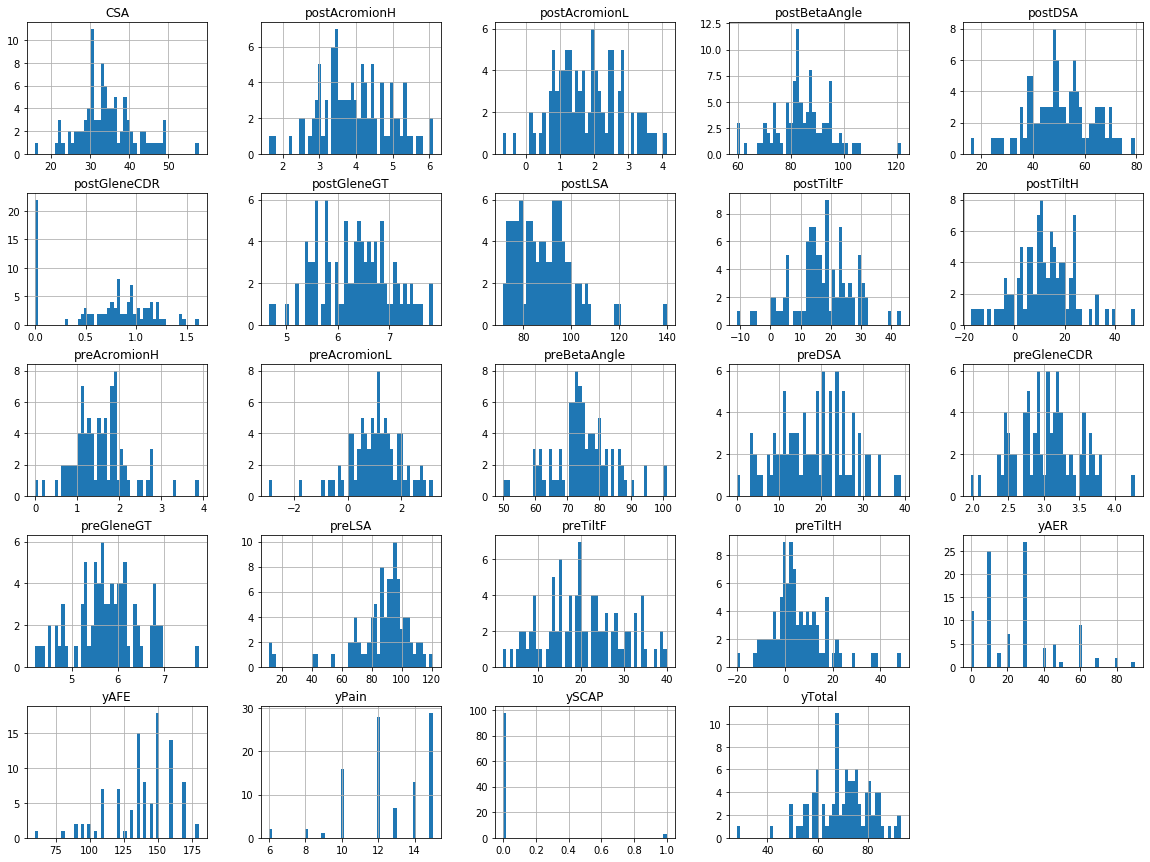

In [229]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

- Outliers have been checked with JDW
- Attributes on very different scales (feature scaling needed)
- Many histo are heavy-tailed so harder to predict patterns (feature transformation needed to make it bell-shaped)

In [230]:
corr = data.corr()

In [231]:
corr['yTotal'].sort_values(ascending=False)

yTotal           1.000000
yAFE             0.737368
yPain            0.684177
yAER             0.389882
postAcromionL    0.104961
preTiltF         0.078885
postDSA          0.050244
CSA              0.020284
preTiltH         0.012790
preGleneCDR      0.008868
postAcromionH   -0.021807
preLSA          -0.025311
preAcromionH    -0.041848
preBetaAngle    -0.060596
preGleneGT      -0.062073
preAcromionL    -0.070870
postGleneCDR    -0.124440
postTiltF       -0.135215
preDSA          -0.153058
postLSA         -0.165487
postGleneGT     -0.190724
postBetaAngle   -0.244092
postTiltH       -0.335526
ySCAP           -0.343898
Name: yTotal, dtype: float64

- The correlation coefficient only measures linear dependence (“if x
goes up, then y generally goes up/down”): 1/ It may completely miss
out on nonlinear relationships 2/ has nothing to do with the slope

- pair scatter plots on few promising attributes that seem correlated with yTotal

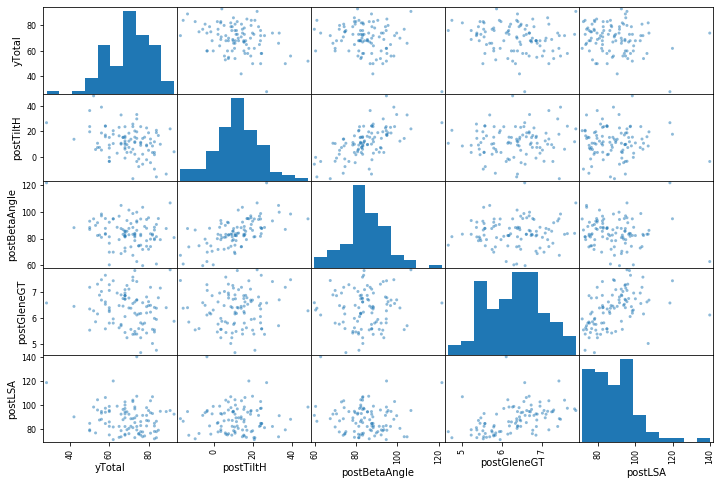

In [232]:
from pandas.plotting import scatter_matrix
attributes = ["yTotal", "postTiltH", "postBetaAngle",
"postGleneGT", "postLSA"]
scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()

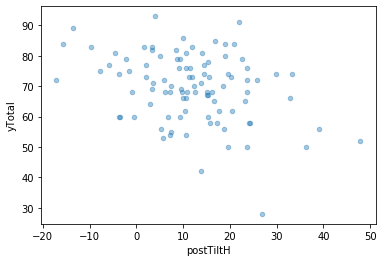

In [233]:
data.plot(kind="scatter", x="postTiltH", y="yTotal",
alpha=0.4)

- not very strong correlation (dispersed points)
- try out various attribute combinations (combine some not very useful features for more pertinent one eg rooms per households, bedrooms per room...) and look at correlation matrix again

In [234]:
data_aug = data.copy()
data_aug["ratioLSA"] = data["postLSA"]/data["preLSA"]
data_aug["ratioDSA"] = data["postDSA"]/data["preDSA"]
data_aug["ratioGleneCDR"] = data["postGleneCDR"]/data["preGleneCDR"]
data_aug["ratioGleneGT"] = data["postGleneGT"]/data["preGleneGT"]
data_aug["ratioAcromionH"] = data["postAcromionH"]/data["preAcromionH"]
data_aug["ratioAcromionL"] = data["postAcromionL"]/data["preAcromionL"]
data_aug["ratioBetaAngle"] = data["postBetaAngle"]/data["preBetaAngle"]
data_aug["ratioTiltH"] = data["postTiltH"]/data["preTiltH"]
data_aug["ratioTiltF"] = data["postTiltF"]/data["preTiltF"]
corr = data_aug.corr()
corr["yTotal"].sort_values(ascending=False)

yTotal            1.000000
yAFE              0.737368
yPain             0.684177
yAER              0.389882
ratioAcromionH    0.135706
ratioDSA          0.133668
postAcromionL     0.104961
preTiltF          0.078885
postDSA           0.050244
CSA               0.020284
preTiltH          0.012790
preGleneCDR       0.008868
postAcromionH    -0.021807
preLSA           -0.025311
preAcromionH     -0.041848
preBetaAngle     -0.060596
preGleneGT       -0.062073
ratioTiltH       -0.068754
preAcromionL     -0.070870
ratioTiltF       -0.079391
ratioGleneGT     -0.081154
ratioLSA         -0.083078
postGleneCDR     -0.124440
postTiltF        -0.135215
ratioGleneCDR    -0.151814
preDSA           -0.153058
ratioBetaAngle   -0.159125
ratioAcromionL   -0.162143
postLSA          -0.165487
postGleneGT      -0.190724
postBetaAngle    -0.244092
postTiltH        -0.335526
ySCAP            -0.343898
Name: yTotal, dtype: float64

- ratioAcromionH, ratioAcromionL seems better attributes (GleneCDR et DSA un peu)

### Custom transformers to add attributes

In [235]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

preAcromionH_ix, preAcromionL_ix, postAcromionH_ix, postAcromionL_ix = 5, 6, 14, 15


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_ratios = False): 
        self.add_ratios = add_ratios
    def fit(self, X, y=None):
        return self 
    def transform(self, X, y=None):
        if self.add_ratios:
            ratioAcromionH = X[:, postAcromionH_ix] / X[:, preAcromionH_ix]
            ratioAcromionL = X[:, postAcromionL_ix] / X[:, preAcromionL_ix]
            return np.c_[X, ratioAcromionH, ratioAcromionL]
        else:
            return X

### Data Preparation
- **Cleaning**: get rid of all subjects w/o yAIR bc categorical can't impute
- **On numerical attributes**:
    - Imputation: to handle missing values of numerical attributes
    - Complete: add promising attributes
    - Feature scaling: ML algo don’t perform well when the input numerical attributes have very different scales
- **On categorical attributes**:
     - OneHotEncoding: from text cat to int cat to 1hot vec

In [236]:
data = data.dropna(subset=['yAIR'])

ylabels = ['ySCAP', 'yAFE', 'yAIR', 'yAER', 'yPain', 'yTotal']

data_labels = data[ylabels].copy()
data_labels.info()

data = data.drop(ylabels, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 1 to 51L
Data columns (total 6 columns):
ySCAP     98 non-null int64
yAFE      98 non-null float64
yAIR      98 non-null object
yAER      98 non-null float64
yPain     98 non-null float64
yTotal    98 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 5.4+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 1 to 51L
Data columns (total 19 columns):
CSA              91 non-null float64
preLSA           91 non-null float64
preDSA           91 non-null float64
preGleneCDR      82 non-null float64
preGleneGT       82 non-null float64
preAcromionH     82 non-null float64
preAcromionL     82 non-null float64
preBetaAngle     89 non-null float64
preTiltH         91 non-null float64
preTiltF         89 non-null float64
postLSA          97 non-null float64
postDSA          97 non-null float64
postGleneCDR     97 non-null float64
postGleneGT      97 non-null float64
postAcromionH    97 non-null float64
postAcrom

In [355]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Imputer, LabelBinarizer

pipeline = Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder(add_ratios=False)),
#    ('std_scaler', StandardScaler()), 
])

X = pipeline.fit_transform(data)
y = data_labels['yTotal'].values
X.shape, y.shape

((98, 19), (98,))

In [356]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=10, random_state=42)
print(f'Target variable lies in {y.min():.0f}-{y.max():.0f}')

Target variable lies in 28-93


### Train & evaluate model

In [305]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
scores = - cross_val_score(lin_reg, X, y, cv=cv,
                         scoring='neg_mean_absolute_error')

print(f'Prediction score: {scores.mean():.2f} +/- {scores.std():.2f}')

Prediction score: 13.45 +/- 6.32


In [306]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
scores = - cross_val_score(tree_reg, X, y, cv=cv,
                         scoring='neg_mean_absolute_error')

print(f'Prediction score: {scores.mean():.2f} +/- {scores.std():.2f}')

Prediction score: 11.35 +/- 2.00


In [307]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100)
scores = - cross_val_score(forest_reg, X, y, cv=cv,
                         scoring='neg_mean_absolute_error')

print(f'Prediction score: {scores.mean():.2f} +/- {scores.std():.2f}')

Prediction score: 9.55 +/- 1.78


In [357]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'bootstrap': [True],
 'n_estimators': [30, 60, 100], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False],
 'n_estimators': [30, 60, 100], 'max_features': [2, 4, 6, 8]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=cv,
                           scoring='neg_mean_absolute_error')
grid_search.fit(X,y)
grid_search.best_params_, - grid_search.best_score_

({'bootstrap': False, 'max_features': 2, 'n_estimators': 60}, 9.21734693877551)

In [353]:
res = grid_search.cv_results_
for mean_score, params in zip(res['mean_test_score'], res['params']):
    print(f'{-mean_score:.2f} {params}')

9.47 {'bootstrap': True, 'max_features': 2, 'n_estimators': 30}
9.35 {'bootstrap': True, 'max_features': 2, 'n_estimators': 60}
9.54 {'bootstrap': True, 'max_features': 2, 'n_estimators': 100}
9.60 {'bootstrap': True, 'max_features': 4, 'n_estimators': 30}
9.77 {'bootstrap': True, 'max_features': 4, 'n_estimators': 60}
9.48 {'bootstrap': True, 'max_features': 4, 'n_estimators': 100}
9.93 {'bootstrap': True, 'max_features': 6, 'n_estimators': 30}
9.89 {'bootstrap': True, 'max_features': 6, 'n_estimators': 60}
9.40 {'bootstrap': True, 'max_features': 6, 'n_estimators': 100}
9.56 {'bootstrap': True, 'max_features': 8, 'n_estimators': 30}
9.63 {'bootstrap': True, 'max_features': 8, 'n_estimators': 60}
9.42 {'bootstrap': True, 'max_features': 8, 'n_estimators': 100}
9.75 {'bootstrap': False, 'max_features': 2, 'n_estimators': 30}
9.39 {'bootstrap': False, 'max_features': 2, 'n_estimators': 60}
9.47 {'bootstrap': False, 'max_features': 2, 'n_estimators': 100}
9.47 {'bootstrap': False, 'max_f

In [354]:
feature_importances = grid_search.best_estimator_.feature_importances_
attributes = list(data)
sorted(zip(feature_importances, attributes), reverse=True)

[(0.08150116258925376, 'postTiltH'),
 (0.07011202742129485, 'preDSA'),
 (0.06491757197387288, 'postBetaAngle'),
 (0.06091700902730995, 'postTiltF'),
 (0.05934230424477429, 'postGleneGT'),
 (0.05755392247409823, 'postGleneCDR'),
 (0.05115491084266178, 'preGleneGT'),
 (0.05101181582981825, 'preTiltF'),
 (0.050947312843617365, 'postDSA'),
 (0.048869208687575494, 'preBetaAngle'),
 (0.04882710908046134, 'postAcromionH'),
 (0.04855387412132586, 'postLSA'),
 (0.04796486583697339, 'preTiltH'),
 (0.04696684504878603, 'postAcromionL'),
 (0.046609443820232244, 'preAcromionH'),
 (0.04464774674646053, 'preLSA'),
 (0.042811363075460726, 'CSA'),
 (0.03866392865747683, 'preAcromionL'),
 (0.03862757767854637, 'preGleneCDR')]